This Notebook illustrates the different steps taken to do the data cleaning and feature engineering.

In [3]:
# import necessary libraries
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
import seaborn as sns
import random

# Data Cleaning Phase 1

This the first phase of data cleaning. It is very basic and is done on the data format and columns names. 

The first thing noticed was that when reading the original csv file "books.csv" some contents of sepicific sections in specific rows were separated by commas. This caused an error, because pd.read_csv considered them as content belonging to different sections (i.e. columns), resulting in different number of columns for several rows. Luckily, these content were separate by a comma and space ", ", which made it easy to solve the problem by replacing the ", " by "/" as seen below. "books_updated.csv" is the new updated csv which is read by pandas with success.

In [4]:
### COMMENT THE FOLLOWING CELL IF YOU HAVE ALREADY RUN IT BEFORE AND SAVED THE books_updated.csv ###
# Specify the filename
filename = 'books.csv'
updated_filename = "books_updated.csv"

## In some cases in certain fields such us author the authors are separated by ", " 
## to avoid problems when reading the csv directly using pandas and to retain all rows the following steps done

# Open the file and read lines
with open(filename, 'r', encoding='utf-8') as file: # utf-8 encoding to support all languages since there are non-english content
    lines = file.readlines()

# Process the lines to handle unwanted delimiters
cleaned_lines = []
is_firstline = True # used to avoid updating the first line

for line in lines:
    
    if is_firstline: # if it is the first line i.e. Header do not update it
        is_firstline = False
        cleaned_lines.append(line)
        continue
    cleaned_line = line.replace(', ', '/')

    # Append the cleaned line
    cleaned_lines.append(cleaned_line)

# rejoin all the lines to create a new updated csv
with open(updated_filename, 'w', encoding='utf-8') as output_file:
    for cleaned_line in cleaned_lines:
        output_file.write(cleaned_line + '\n')


In [5]:
# Read the cleaned data into a DataFrame
df = pd.read_csv(updated_filename, delimiter = ",", encoding = 'utf-8', index_col=False) 

# Look at the first 5 rows of the DataFrame
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


Looking closer at the column names, we notice that in one of the column '  num_pages' the name starts with space. For ease of use, it is better to remove this unnecessary space.

In [6]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [7]:
# Remove the space before the column num_pages, for ease of use
df.rename(columns={'  num_pages': '  num_pages'.replace(' ', '')}, inplace=True)
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

Examining the column types, it is noticed that some of the columns that are supposed to be numerical types are object types

In [8]:
types_columns=df.dtypes
number_lines,number_columns=df.shape
print(types_columns)

bookID                 object
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                 object
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count     object
publication_date       object
publisher              object
dtype: object


In [10]:
# investigate if their are non-numerical non-date types in supposedly numerical and date columns
# Display the non-numerical and non_date values of the selected columns
columns = ["isbn", "isbn13", "text_reviews_count"]
check_non_numerical_date(df, columns, "numerical")
check_non_numerical_date(df, ["publication_date"], "date")

The non_numerical_values in column isbn :  3        043965548X
12       076790818X
16       076790382X
27       097669400X
40       006076273X
            ...    
11090    030727411X
11101    074347788X
11106    057305133X
11110    843221728X
11115    972233168X
Name: isbn, Length: 985, dtype: object
The non_numerical_values in column isbn13 :  1847    en-US
Name: isbn13, dtype: object
The non_numerical_values in column text_reviews_count :  1847    9/1/2003
Name: text_reviews_count, dtype: object
The non_date_values in column publication_date :  1847      MTV Books
8180     11/31/2000
11098     6/31/1982
Name: publication_date, dtype: object


From the above investigation one can notice the following : 
- isbn is not numerical since some of the isbn codes end with X 
- we notice that at index location 1847 the data is shifted to the left
- dates at index locations 8180 and 11098 were not considered as dates since they are wrong. June and November are 31 days, but in reality they are only 30 days.

Also, as seen below there is one empty cell in publisher column, which is on index location 1847.

In [11]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             1
dtype: int64

In [12]:
df["publisher"][df["publisher"].isna()==True]

1847    NaN
Name: publisher, dtype: object

In [13]:
df.iloc[1847]

bookID                6549/ said the shotgun to the head.
title                                       Saul Williams
authors                                              4.22
average_rating                                743470796.0
isbn                                        9780743470797
isbn13                                              en-US
language_code                                         192
num_pages                                            2762
ratings_count                                         214
text_reviews_count                               9/1/2003
publication_date                                MTV Books
publisher                                             NaN
Name: 1847, dtype: object

One can notice that there is a / in the bookID which separates the BookID from the book title. This must be a result from updating automatically the csv files at the beginning. 

Below is the code to fix this unwanted mistake

In [14]:
bookid_title = df["bookID"].iloc[1847].split('/')


# content of the remaining columns
remaining_columns = df[['title', 'authors', 'average_rating', 'isbn', 'isbn13',
                                   'language_code', 'num_pages', 'ratings_count', 
                                   'text_reviews_count', 'publication_date']].iloc[1847]


# rearrange cells content for each column
df.iloc[1847, 2:] = remaining_columns
df["bookID"].iloc[1847]= bookid_title[0]
df["title"].iloc[1847]= bookid_title[1]

C:\Users\kader\AppData\Local\Temp\ipykernel_18436\3963356864.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.22' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[1847, 2:] = remaining_columns
C:\Users\kader\AppData\Local\Temp\ipykernel_18436\3963356864.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '192' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[1847, 2:] = remaining_columns
C:\Users\kader\AppData\Local\Temp\ipykernel_18436\3963356864.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bookID"].iloc[1847]= bookid_title[0]
C:\Users\kader\AppD

In [15]:
# rechek the content 
df.iloc[1847]

bookID                                          6549
title                  said the shotgun to the head.
authors                                Saul Williams
average_rating                                  4.22
isbn                                     743470796.0
isbn13                                 9780743470797
language_code                                  en-US
num_pages                                        192
ratings_count                                   2762
text_reviews_count                               214
publication_date                            9/1/2003
publisher                                  MTV Books
Name: 1847, dtype: object

In [16]:
# Check the types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  object
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  object
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.0+ MB


For some reasons the supposedly numerical columns became objects 
Re-investigate again if they contain non-numerical content

In [17]:
# re-investigate if there is non-numerical content in supposedly numerical columns
columns = ["average_rating", "isbn13", "text_reviews_count", "num_pages", "ratings_count", "text_reviews_count"]
check_non_numerical_date(df, columns, "numerical")

The non_numerical_values in column average_rating :  Series([], Name: average_rating, dtype: object)
The non_numerical_values in column isbn13 :  Series([], Name: isbn13, dtype: object)
The non_numerical_values in column text_reviews_count :  Series([], Name: text_reviews_count, dtype: object)
The non_numerical_values in column num_pages :  Series([], Name: num_pages, dtype: object)
The non_numerical_values in column ratings_count :  Series([], Name: ratings_count, dtype: int64)
The non_numerical_values in column text_reviews_count :  Series([], Name: text_reviews_count, dtype: object)


They do not contain non-numerical content, so will transform them to numerical

In [18]:
columns = ["average_rating", "isbn13", "text_reviews_count", "num_pages", "ratings_count", "text_reviews_count"]

df = convert_to_numerical(df, columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [19]:
# fix the dates by replacing 31 with 30 in June and November
# convert the date column to type pd.datetime
df["publication_date"].iloc[8180] = '11/30/2000'
df["publication_date"].iloc[11098] = '6/30/1982'

C:\Users\kader\AppData\Local\Temp\ipykernel_18436\3398859105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_date"].iloc[8180] = '11/30/2000'
C:\Users\kader\AppData\Local\Temp\ipykernel_18436\3398859105.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_date"].iloc[11098] = '6/30/1982'


Resave the DataFrame to avoid repeating the process each time we want to use the df

In [20]:
df.to_csv("books_updated.csv", index_label=False) # index_label = False so that it does not add another index label to the DataFrame

# Data Cleaning Phase 2

This data cleaning is done on the data set after doing webscraping. Through webscraping extra features were extracted which are: 

- first_publish : this is the date a book was first published (this will help distinguish two different books with the same name)
- book_format : this is the format of the book (some books are present in different formats (paperback, Audio CD, hardcover))
- new_publisher: this is because it was noticed that in the original data some books had wrong publishers
- edition_avgRating: this is the actaul average rating of each edition
- added_toShelves: this is the number of users that added a book to shelves

*For more details about the process of scraping, please refer to scraper/scraper.py*

### Read the Data

In [21]:
# read the scraped data
df_scraped = pd.read_csv("scraper/booksRating_extraFeats.csv")

In [22]:
df_scraped.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,new_publisher,edition_avgRating,added_toShelves
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,"July 16, 2005",Paperback,Scholastic Inc,4.57,4405980.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,"June 21, 2003",Paperback,Scholastic Inc.,4.50,4518536.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,"July 2, 1998",Hardcover,NaN,4.05,7469.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,"July 8, 1999",Mass Market Paperback,Scholastic Inc.,4.57,5223956.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,"October 1, 2003",Paperback,Scholastic,4.72,172736.0


In [23]:
df_scraped.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,new_publisher,edition_avgRating,added_toShelves
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,2004-12-21,Da Capo Press,"December 1, 2004",Paperback,Da Capo Press,4.06,552.0
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,1988-12-01,Penguin Books,"June 27, 1987",Paperback,Penguin Books,4.04,4269.0
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,1993-08-01,Penguin Books,"January 1, 1990",Paperback,Penguin Publishing Group,3.98,4686.0
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2007-02-27,Ecco,"January 1, 2007",Hardcover,Ecco,3.75,2948.0
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,2006-05-28,Edimat Libros,"June 1, 1876",Paperback,NaN,3.72,228.0


In [24]:
df_scraped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
 12  first_published     11125 non-null  object 
 13  book_format         11126 non-null  object 
 14  new_publisher       8360 non-null   object 
 15  edition_avgRating   11124 non-null  float64
 16  adde

### Fill Missing Data

In the new dataset, there is 2 missing data in the first_published, 1 missing value in the book_format, 3 missing values in the edition_avgRating and added_toShelves. These were values that the scraper failed to get. Since they are very few, they will be filled manually. 

In [25]:
df_scraped[df_scraped[["first_published", "book_format", "edition_avgRating", "added_toShelves"]].isna().any(axis=1)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,new_publisher,edition_avgRating,added_toShelves
2255,8077,Animales No Se Visten Los (Animals Should Def...,Judi Barrett/Ron Barrett,4.11,1595191356,9781595191359,eng,32,0,0,1991-10-30,Live Oak Media,"January 1, 1970",Paperback,Atheneum Books for Young Readers,NaN,NaN
6396,24062,The Deep (Dive Trilogy),Gordon Korman,3.78,0613674839,9780613674836,eng,148,0,0,2003-07-01,Turtleback Books,NaN,NaN,NaN,NaN,NaN
8476,32552,Essential Tales and Poems,Edgar Allan Poe/Benjamin F. Fisher,4.36,1593080646,9781593080648,en-US,688,66382,109,2004-10-25,Barnes Noble Classics,NaN,Paperback,Barnes & Noble Classics,4.36,92622.0
8520,32703,The Diary of Ellen Rimbauer: My Life at Rose Red,Joyce Reardon/Steven Rimbauer/Ridley Pearson,3.67,0786890436,9780786890439,eng,277,7852,352,2001-04-29,Hyperion,"January 1, 2001",Mass Market Paperback,Hyperion,NaN,NaN


In [26]:
df_scraped.loc[2255, ["edition_avgRating", "added_toShelves"]] = [4.11, 5402]
# df_scraped.loc[6396, ["first_published", "book_format", "new_publisher", "edition_avgRating", "added_toShelve"]] ### !!!! Couldn't find exact book edition online !!!!
df_scraped.loc[8476, ["first_published"]] = ["January 1, 1843"]
df_scraped.loc[8520, ["edition_avgRating", "added_toShelves"]] = [3.7, 15942]

One of the books at index 6396 was not found on good reads even when searching by book ID, isbn and isbn13. However, it was found under the following link on GoodReads : https://www.goodreads.com/book/show/24037.The_Deep

As the information on the goodreads page are not exactly the same as the ones in line 6385, the information is refilled manually based on the GoddReads page (the title, num_pages and average rating were the same in the database and the link to goodread).

In [27]:
df_scraped.loc[6396, ["ratings_count", "text_reviews_count", "first_published","book_format","new_publisher","edition_avgRating","added_toShelves"]] = [1659,66,"July 1, 2003","Paperback","Scholastic",3.78,3004]

In [28]:
df_scraped.iloc[6396]

bookID                                  24062
title                 The Deep (Dive Trilogy)
authors                         Gordon Korman
average_rating                           3.78
isbn                               0613674839
isbn13                          9780613674836
language_code                             eng
num_pages                                 148
ratings_count                            1659
text_reviews_count                         66
publication_date                   2003-07-01
publisher                    Turtleback Books
first_published                  July 1, 2003
book_format                         Paperback
new_publisher                      Scholastic
edition_avgRating                        3.78
added_toShelves                        3004.0
Name: 6396, dtype: object

For the new_publisher, the scraper failed to get a lot of values, this is because of how the publisher is saved in the html. Due to constraint of time, and since there is already a publisher column in the original dataset. In the cases where there are NaN the old publisher will be put. The new publisher will be taken, only in the cases where the new publisher is different from the old publisher in value.

In [29]:
for index, row in df_scraped.iterrows():
    # Check if the new publisher is different from the old publisher
    if pd.notna(row['new_publisher']) and row['new_publisher'] != row['publisher']:
        # Update the publisher with the new publisher value
        df_scraped.at[index, 'publisher'] = row['new_publisher']
    else:
        # Use the old publisher if the new publisher is NaN or the same as the old publisher
        df_scraped.at[index, 'publisher'] = row['publisher']

In [30]:
df_scraped[["publisher", "new_publisher"]].sample(5)

,publisher,new_publisher
10869,Zondervan,Zondervan
4760,"Dramatists Play Service, Inc.","Dramatists Play Service, Inc."
8098,Penguin Books Ltd,NaN
7143,Oxford University Press,Oxford University Press
6471,DC Comics,DC Comics


In [31]:
# drop new_publisher column
df_scraped.drop(columns="new_publisher", inplace=True)

By looking at the data, we notice that for some line, the first_published date didn't extracted well, and it's written "ary" instead of january or february.

In [33]:
df_scraped.first_published.sample(5)

1066      January 1, 1994
4829     January 14, 2002
10846     January 1, 1991
4493          ary 3, 2004
8039      August 12, 1976
Name: first_published, dtype: object

In [34]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 20)
df_scraped[['title','first_published']][df_scraped['first_published'].str.contains(r'\bary\b', case=False) & ~df_scraped['first_published'].str.contains(r'january|february', case=False)]

,title,first_published
56,Simply Beautiful Beaded Jewelry,"ary 28, 2006"
77,The Power of One: The Solo Play for Playwrights Actors and Directors,"ary 7, 2000"
124,Tropic of Capricorn,"ary 1, 1939"
176,Gravity's Rainbow,"ary 28, 1973"
179,Gravity's Rainbow,"ary 28, 1973"
...,...,...
11067,The Home Front,"ary 23, 1989"
11090,La conspiración de los alquimistas,"ary 1, 1999"
11092,The Call of the Mall: How we shop,"ary 2, 2004"
11101,Undaunted Courage: The Pioneering First Mission to Explore America's Wild Frontier,"ary 15, 1996"


In [35]:
# We will replace the "ary" in those line by "february" 
# Filter rows containing "ary" but not "january" or "february"
filtered_rows = df_scraped['first_published'].str.contains(r'ary', case=False) & ~df_scraped['first_published'].str.contains(r'january|february', case=False)

# Replace the filtered results with "february"
df_scraped.loc[filtered_rows, 'first_published'] = df_scraped.loc[filtered_rows, 'first_published'].str.replace(r'ary', 'february', case=False)

In [36]:
df_scraped[['title','first_published']][df_scraped['first_published'].str.contains('published', case=False)]

,title,first_published
133,Love Letters,"Published January 1, 1999"
201,Timbuktu / Leviathan / Moon Palace,"Published October 31, 2002"
203,The Coming Economic Collapse: How You Can Thrive When Oil Costs $200 a Barrel,"Published February 21, 2006"
229,Guidebook to Zen and the Art of Motorcycle Maintenance,"Published November 19, 1990"
263,Best of London (Lonely Planet Best Of),"Published January 1, 2004"
...,...,...
10881,The Best American Travel Writing 2006,"Published October 11, 2006"
10898,Poems Between Women: Four Centuries of Love Romantic Friendship and Desire,"Published April 15, 1999"
10937,Un amour de swann (À la recherche du temps perdu #1.2),"Published January 1, 2006"
10947,Poetry and Prose of Alexander Pope (Riverside Editions),"Published January 2, 1968"


In [37]:
# Let's delete the word "published" from the first_published column
df_scraped['first_published'] = df_scraped['first_published'].str.replace('published ', '')

### Set text columns to lower text

When dealing with text data it always safer to have them all in the same case either lower or upper 

In [38]:
# get the text columns
text_columns = df_scraped.select_dtypes(include=['object']).columns

# Convert to lowercase
df_scraped = to_lower(df_scraped, text_columns)

In [39]:
df_scraped.sample(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves
3462,12614,the chomsky-foucault debate: on human nature,noam chomsky/michel foucault/john rajchman,3.94,1595581340,9781595581341,eng,213,1953,116,2006-09-01,the new press,"january 1, 1974",paperback,3.99,11635.0
4614,16598,vampire hunter d volume 04: tale of the dead town,hideyuki kikuchi/yoshitaka amano,3.92,1595820930,9781595820938,en-us,205,1158,30,2006-05-24,digital manga publishing / dark horse,"january 31, 1986",paperback,3.93,2512.0
10670,43486,raven (orphans #4),v.c. andrews,3.71,0671020315,9780671020316,eng,192,4678,59,1999-01-27,pocket books,"january 1, 1998",paperback,3.72,10348.0
10797,44045,a universal history of iniquity,jorge luis borges/andrew hurley,3.97,0142437891,9780142437896,eng,128,3101,129,2004-07-27,penguin publishing group,"january 1, 1935",paperback,4.04,9682.0
6023,22557,wasteland of flint,thomas harlan,3.79,0765341131,9780765341136,eng,512,291,38,2004-02-01,tor books,"january 1, 2003",mass market paperback,3.76,893.0


### Take First Author Name and Create num_contributors Column

We have decided to take only the name of the first author, since usually first authors are the main authors. Another column will be added to indicate the total number of authors/contributors to the book.

In [40]:
# take the first author in the authors column
df_scraped["first_author"] = df_scraped["authors"].apply(lambda x: x.split("/")[0].strip())


In [41]:
df_scraped["first_author"].sample(5)

6491    marcus tullius cicero
7933          erin st. claire
9455           claudia bishop
5623              garry wills
105           john carratello
Name: first_author, dtype: object

In [42]:
df_scraped["num_contributors"] = df_scraped["authors"].apply(lambda x: len(x.split("/")))

In [43]:
df_scraped[["authors","num_contributors"]].sample(5)

,authors,num_contributors
10887,roald dahl,1
2642,erica jong,1
7928,sandra brown,1
7017,mary pope osborne/salvatore murdocca,2
8733,james patterson,1


In [44]:
# drop authors column
df_scraped.drop(columns="authors", inplace=True)

### Clean Text Columns

Remove punctuation, and extra white spaces from all text columns.

Better clean the text in publisher column, to avoid having same publishers represented differently. 
Example: indexes 5993, 5365 and 9753, W.W. Norton & Company, W. W. Norton and Company and W. W. Norton  Company represent the same publisher

In [45]:
general_replacements = [
    (r'[^\w\s]', ''), # remove punctuation
    (r'\s\s+', " "), # remove double spaces and more
]

columns_ = ["title", "first_author"]

df_scraped = sub_text(df_scraped, columns_, general_replacements)

In [46]:
# strip to remove spaces from beginning and end
df_scraped["title"] = df_scraped["title"].str.strip()
df_scraped["first_author"] = df_scraped["first_author"].str.strip()

In [47]:
df_scraped[["title", "first_author"]].sample(5)

,title,first_author
5589,the print ansel adams photography 3,ansel adams
4290,swell foop xanth 25,piers anthony
10696,the people of paper,salvador plascencia
9748,let down your hair,jane b mason
10960,working effectively with legacy code,michael c feathers


In [48]:
specific_replacements = [
    (r'\binc.?\b', ""), #remove inc
    (r'\bllc.?\b', ""), #remove llc
    (r'\bltd.?\b', ""), #remove ltd
    (r"w. w.", "ww"), #convert w. w. to ww
    (r"&", " and "), #substiute & by and
    (r'\([^)]*\)', ''), #remove everything within parentheses
    (r"\bpaperbacks?\b", ""), #remove paperback or paperbacks
    (r'\bbooks?\b', ""),  #remove book and books
    (r'\bclassics?\b', ""), #remove classic and classics
    (r'\bpublishers?\b', ""), #remove publisher or publishers
    (r'\bpress\b', ""), #remove press
    (r'\bpublishing\b', ""), #remove publishing
    (r'\bpublications?\b', ""), #remove publication or publications
    (r'\bgroups?\b', "") #remove group or groups
]

df_scraped = sub_text(df_scraped, ["publisher"], specific_replacements)

In [49]:
#apply the general replacements on the publisher column 
df_scraped = sub_text(df_scraped, ["publisher"], general_replacements)
# strip to remove spaces from beginning and end
df_scraped["publisher"] = df_scraped["publisher"].str.strip()

In [50]:
df_scraped['publisher'].sample(5)

10851          vintage
6447           nonsuch
9763     grand central
10767             dell
2470     seven stories
Name: publisher, dtype: object

### Analyse the edition_avgRating column

In [51]:
df_scraped['edition_avgRating'].isna().any()

False

Check cases when the average_rating is different from edition_avgRating

In [52]:
df_rating = df_scraped.copy()
df_rating['diff_rating'] = df_rating['average_rating'] - df_rating['edition_avgRating']
filtered_df = df_rating[df_rating['diff_rating'] != 0]
filtered_df[['title', 'average_rating', 'edition_avgRating']].sample(10)

,title,average_rating,edition_avgRating
6239,the complete world of greek mythology,4.24,4.23
1044,love first site,3.41,3.42
1538,a christmas carol,4.05,4.02
10754,wizards first rule sword of truth 1,4.13,4.12
7752,gone for soldiers a novel of the mexican war,4.14,4.02
5081,nearer the moon from a journal of love the unexpurgated diary of anaïs nin 19371939,4.23,4.25
321,read my lips sexual subversion and the end of gender,3.95,4.01
3392,when somebody loves you back soulmates dissipate 6,4.38,4.39
8308,walking the bible a journey by land through the five books of moses,3.87,3.86
9359,the gospel of filth a bible of decadence darkness,4.45,4.47


In [53]:
print('The average mean of difference between average rating and edition rating is ', round(df_rating['diff_rating'].mean(),2) )

The average mean of difference between average rating and edition rating is  0.03


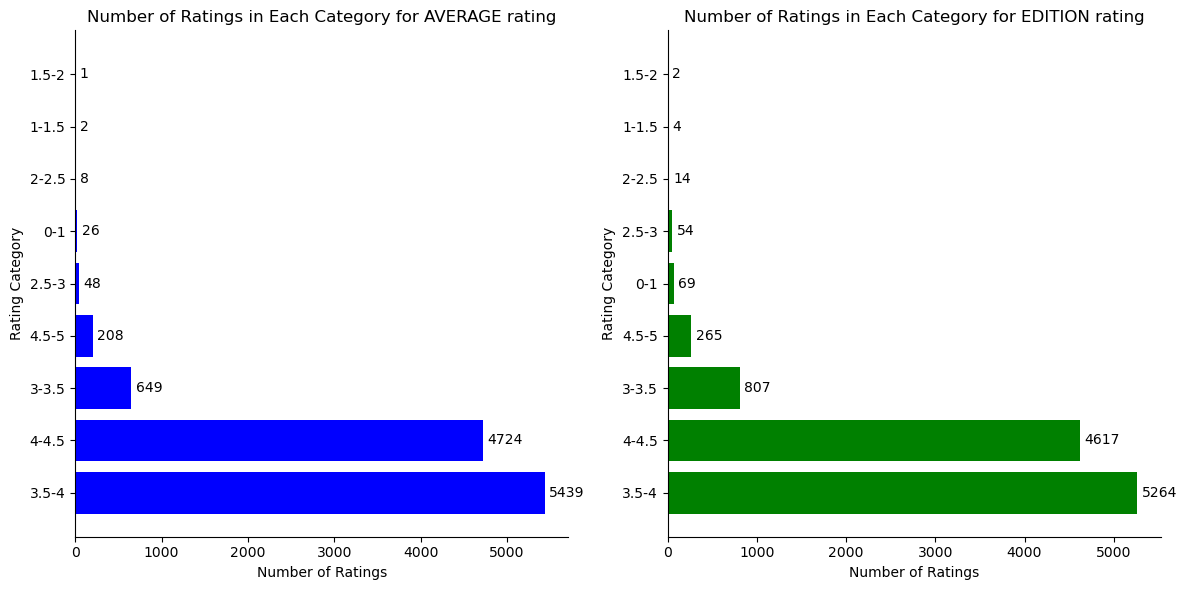

In [54]:
#We need to know if the repartition is the same for average rating or edition rating :

# Define bins and labels for average rating and edition rating
bins = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = ['0-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

# Create a new column with the bin labels for average rating and edition rating
df_rating['average_rating_category'] = pd.cut(df_rating['average_rating'], bins=bins, labels=labels, right=False)
df_rating['edition_rating_category'] = pd.cut(df_rating['edition_avgRating'], bins=bins, labels=labels, right=False)

# Count the number of ratings in each category for both
rating_counts_per_category_average = df_rating['average_rating_category'].value_counts()
rating_counts_per_category_edition = df_rating['edition_rating_category'].value_counts()

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph based on df_scraped['average_rating']
axs[0].barh(rating_counts_per_category_average.index, rating_counts_per_category_average.values, color='blue')
axs[0].set_title('Number of Ratings in Each Category for AVERAGE rating')
axs[0].set_xlabel('Number of Ratings')
axs[0].set_ylabel('Rating Category')

# Add values on top of each bar for the first graph
for index, value in enumerate(rating_counts_per_category_average):
    axs[0].text(value+50, index, str(value), ha='left', va='center')

# Plot the second graph based on df_scraped['edition_avgRating']
axs[1].barh(rating_counts_per_category_edition.index, rating_counts_per_category_edition.values, color='green')
axs[1].set_title('Number of Ratings in Each Category for EDITION rating')
axs[1].set_xlabel('Number of Ratings')
axs[1].set_ylabel('Rating Category')

# Add values on top of each bar for the second graph
for index, value in enumerate(rating_counts_per_category_edition):
    axs[1].text(value+50, index, str(value), ha='left', va='center')

# Remove upper and right borders for both subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

When we look at the ratings for each edition, there is very slight improvement in the data imbalance. Yet, we notice that there are more ratings below 3, which are categories with very few ratings.

However, looking at the mean calculated for the difference of the two ratings, we see that it is very small 0.03. So for the vast majority of books, there is very few differences between the 2 ratings. 

In order to have more specific ratings, and to add more relevance to the new data scraped (like book format) and more coherence to already existing data (publication_date and number_of_pages which are specific to the edition), we will now only refer to the edition_avgRating column and drop the average_rating.

In [55]:
df_scraped.drop(columns="average_rating", inplace=True)

### Add "size_of_publisher" column

In [56]:
# Adding the new columns that allows to see if a publisher is often cited
df_scraped['publisher_count'] = df_scraped.groupby('publisher')['publisher'].transform('count')

In [57]:
df_scraped['publisher_count'].value_counts()

publisher_count
1      1129
2       592
556     556
4       412
3       381
       ... 
42       42
38       38
37       37
34       34
32       32
Name: count, Length: 80, dtype: int64

The exact number of time a publisher name is in the database is not as relevant as the number of time an author or a title is in it.
To simplify this information, we can, instead of the count, create a column that categorize the publisher :
- Small publisher (1) = 10 or less times in the database
- Medium publisher (2) = between 10 annd 30 times
- big publisher (3) = more that 30 times

In [67]:
publisher_count_ranges = [0, 11, 31, float('inf')] # [0, 10] --> 1 - [11, 30] --> 2, [30, +inf] --> 3

df_scraped['size_of_publisher'] = pd.cut(df_scraped['publisher_count'], bins=publisher_count_ranges, labels=[1, 2, 3], right=False)


In [68]:
print('Number of line with small publisher',len(df_scraped[df_scraped['size_of_publisher'] == 1]))
print('Number of line with medium publisher',len(df_scraped[df_scraped['size_of_publisher'] == 2]))
print('Number of line with big publisher',len(df_scraped[df_scraped['size_of_publisher'] == 3]))

Number of line with small publisher 3861
Number of line with medium publisher 2142
Number of line with big publisher 5124


In [69]:
#Now that we have the "size_of_publisher" column, let's delete the "publisher_count" used to create it 
df_scraped.drop(columns=['publisher_count'], inplace=True)

### Create "size_of_author" column

In [70]:
# Check for duplicates in a specific column using value_counts
num_book_per_author = df_scraped["first_author"].value_counts()

# Display values with count greater than 1 (indicating duplicates)
print(num_book_per_author[num_book_per_author > 1])

first_author
william shakespeare    88
stephen king           82
jrr tolkien            51
pg wodehouse           46
agatha christie        45
                       ..
paul farmer             2
amy sedaris             2
ruby ann boxcar         2
anthony loyd            2
james lee burke         2
Name: count, Length: 1471, dtype: int64


Similar as we did with publisher, we can create a column called size_of_author which signifies the number of books this author contirbuted to. 
- Small author (1) = 10 or less times in the database
- Medium author (2) = between 10 and 30 times
- big author (3) = more that 30 times

In [71]:
# Adding the new columns that allows to see if an author is often cited
df_scraped['num_book_per_author'] = df_scraped.groupby('first_author')['first_author'].transform('count')

author_count_ranges = [0, 11, 31, float('inf')] # [0, 10] --> 1 - [11, 30] --> 2, [30, +inf] --> 3
df_scraped['size_of_author'] = pd.cut(df_scraped['num_book_per_author'], bins=author_count_ranges, labels=[1, 2, 3], right=False)

In [72]:
print('Number of line with small author',len(df_scraped[df_scraped['size_of_author'] == 1]))
print('Number of line with medium author',len(df_scraped[df_scraped['size_of_author'] == 2]))
print('Number of line with big author',len(df_scraped[df_scraped['size_of_author'] == 3]))

Number of line with small author 7768
Number of line with medium author 2606
Number of line with big author 753


In [73]:
df_scraped.sample(5)

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,book_age,size_of_publisher,num_book_per_author,size_of_author
10351,41918,there are no children here the story of two boys growing up in the other america,0385265565,9780385265560,eng,323,12092,837,1992-01-05,anchor,"february 1, 1991",paperback,4.30,34232.0,alex kotlowitz,1,3,3,1,1
9680,38638,the secret garden,1402714599,9781402714597,eng,248,575,61,2004-10-01,sterling,"august 1, 1911",hardcover,4.18,1181.0,frances hodgson burnett,2,1,1,7,1
173,409,against the day,159420120x,9781594201202,eng,1085,5296,587,2006-11-21,penguin,"november 21, 2006",hardcover,3.99,28533.0,thomas pynchon,1,3,3,12,2
6283,23704,maison ikkoku volume 14 maison ikkoku 14,1421501422,9781421501420,eng,240,245,6,2005-12-13,viz media,"june 1, 1987",paperback,4.29,448.0,rumiko takahashi,1,3,3,39,3
2353,8572,banker,0718132386,9780718132385,eng,288,3092,132,2000-10-03,michael joseph,"january 1, 1982",hardcover,4.01,5344.0,dick francis,1,1,1,29,2


In [74]:
# drop num_book_per_author
df_scraped.drop(columns="num_book_per_author", inplace=True)

### Create "is_english" column

In [75]:
# Add a new column 'is_english' with 1 for English (en, en-CA, en-GB,...) and 0 for non-English
df_scraped['is_english'] = np.where(df_scraped['language_code'].str.contains('en', case=False), 1, 0)

In [76]:
df_scraped.sample(10)

,bookID,title,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,book_age,size_of_publisher,size_of_author,is_english
1893,6748,a supposedly fun thing ill never do again essays and arguments,0316925284,9780316925280,eng,353,27674,2030,1998-02-02,back bay,"february 12, 1997",paperback,4.24,88522.0,david foster wallace,1,3,3,1,1
10853,44321,a cargo of women susannah watson and the convicts of the princess royal,1877058335,9781877058332,eng,264,0,0,2005-06-01,rosenberg,"december 1, 1988",paperback,0.00,3.0,babette smith,1,1,1,1,1
9423,37380,the heart is a lonely hunter,0618084746,9780618084746,eng,359,77530,4685,2000-09-08,houghton mifflin,"june 4, 1940",paperback,3.99,218325.0,carson mccullers,1,2,2,1,1
3662,13228,cumbres borrascosas,8497644743,9788497644747,spa,384,156,28,2006-05-28,edimat libros,"december 1, 1847",paperback,3.82,320.0,emily brontë,1,1,1,1,0
4362,15677,strangers on a train,0393321983,9780393321982,eng,256,13041,1208,2001-08-28,ww norton and company,"march 15, 1950",paperback,3.79,43671.0,patricia highsmith,1,3,3,1,1
3554,12930,messenger the giver 3,0385732538,9780385732536,eng,169,93589,6654,2006-08-22,delacorte,"april 26, 2004",paperback,3.90,230329.0,lois lowry,1,2,2,1,1
10422,42366,the witch family,015202610x,9780152026103,eng,240,2550,98,2000-09-01,clarion,"january 1, 1960",paperback,4.06,5359.0,eleanor estes,2,3,3,1,1
5722,21330,fables vol 5 the mean seasons,1401204864,9781401204860,eng,166,20703,611,2005-04-30,vertigo,"april 1, 2005",paperback,4.19,31431.0,bill willingham,5,3,3,1,1
9196,35927,smart love,1558321829,9781558321823,eng,272,97,10,2001-05-01,harvard common,"march 11, 1999",paperback,3.77,228.0,martha heineman pieper,2,1,1,1,1
9159,35760,mistaken identity,8172235224,9788172235222,eng,324,0,0,2016-12-30,harper collins,"january 1, 1988",paperback,0.00,4.0,nayantara sahgal,1,1,1,1,1


In [77]:
# drop language_code column
df_scraped.drop(columns="language_code", inplace=True)

### Create "book_count" column

In [78]:
# Adding the new columns that allows to see if a book is often cited
df_scraped['book_count'] = df_scraped.groupby('title')['title'].transform('count')

In [79]:
df_scraped['book_count'].value_counts()

book_count
1    9743
2     776
3     225
4     136
5     105
6      78
8      32
9      18
7      14
Name: count, dtype: int64

In [80]:
df_scraped.query("title == 'the brothers karamazov'")

,bookID,title,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,book_format,edition_avgRating,added_toShelves,first_author,num_contributors,book_age,size_of_publisher,size_of_author,is_english,book_count
1406,4933,the brothers karamazov,0451527348,9780451527349,736,983,91,1999-06-01,signet,"january 1, 1880",mass market paperback,4.27,1638.0,fyodor dostoyevsky,4,3,3,3,1,9
1407,4934,the brothers karamazov,0374528373,9780374528379,796,191531,6795,2002-06-14,farrar straus and giroux,"january 1, 1880",paperback,4.35,855582.0,fyodor dostoyevsky,4,3,3,3,1,9
1408,4935,the brothers karamazov,0140449248,9780140449242,1013,1673,184,2003-02-27,penguin,"january 1, 1880",paperback,4.44,11774.0,fyodor dostoyevsky,2,3,3,3,1,9
1409,4936,the brothers karamazov,0679729259,9780679729259,796,617,80,1991-09-03,vintage usa,"january 1, 1880",paperback,4.51,1381.0,fyodor dostoyevsky,3,1,1,3,1,9
1410,4938,the brothers karamazov,1596440791,9781596440791,16,20,2,2005-05-01,hovel audio,"january 1, 1880",audio cd,4.52,164.0,fyodor dostoyevsky,3,1,1,3,1,9
1411,4940,the brothers karamazov,159308045x,9781593080457,720,1089,202,2004-07-25,barnes noble,"january 1, 1880",paperback,4.38,3421.0,fyodor dostoyevsky,3,2,2,3,1,9
1634,5691,the brothers karamazov,0099922800,9780099922803,796,443,55,1992-01-16,vintage,"january 1, 1880",paperback,4.45,1657.0,fyodor dostoyevsky,3,3,3,3,1,9
1990,7135,the brothers karamazov,0553212168,9780553212167,1072,1022,154,1984-04-01,bantam,"january 1, 1880",mass market paperback,4.37,3236.0,fyodor dostoyevsky,3,3,3,3,1,9
9356,37058,the brothers karamazov,1596440783,9781596440784,16,3,1,2005-05-01,hovel audio,"january 1, 1880",mp3 cd,4.67,9.0,fyodor dostoyevsky,3,1,1,3,1,9


### Create a "is_serie" column

Hypothesis: Books that are part of a series have a number in the title, but that is not the case for all books.

In [81]:
# to view clearly the content
pd.set_option('display.max_colwidth', None)

# Create a regular expression pattern to match titles containing numbers
pattern =  r'(?<!\S)\d{1,2}(?!\S)'  # This pattern matches 1 or 2 digits, which are not preceded or followed by non-white space character

# Use the str.contains() method with the regex pattern to filter the DataFrame
books_with_number = df_scraped[df_scraped['title'].str.contains(pattern)]

# Print or further process the extracted books
books_with_number['title'].sample(20)

10011                                                      the rocky road to romance elsie hawkins 4
5139                                                           everything on a waffle coal harbour 1
9678                                                                      magic bites kate daniels 1
6264     sauron defeated the history of the lord of the rings part four the history of middleearth 9
7843                                                     the harlequin anita blake vampire hunter 15
9763                                                              still life with crows pendergast 4
6294                                                            nausicaä de la vallée du vent tome 4
9923                                                    a year down yonder a long way from chicago 2
5912                                                                        love stargirl stargirl 2
10735                                                               merrick the vampire chr

In [82]:
df_scraped.title.sample(5)

3444        the short history of a prince
344                       monkey business
9219                   first things first
10334                 rock star superstar
9799     the awakening vampire huntress 2
Name: title, dtype: object

One can notice that the vast majority of books with a number in the title are from a serie. Some books have a number in the title and are unique books (for example the books : "poirots early cases 18 hercule poirot mysteries hercule poirot 41" and "72 hour hold") but that's a minority. We will consider that only titles having 1 or 2 digit numbers at the end of them are part of a serie and thus update the above pattern as seen below. However, it is important to keep in mind that this does not guarantee that in few cases we might have books which are part of a series that do not have numbers or have the numbers at the beginning or in the middle.

In [83]:
pattern =  r'(?<!\S)\d{1,2}$(?!\S)'  # This pattern matches only 1 or 2 digits which are at the end of a string and which are not preceded or followed by non-white space character

# Use the str.contains() method with the regex pattern to filter the DataFrame
books_with_number = df_scraped[df_scraped['title'].str.contains(pattern)]

# Print or further process the extracted books
books_with_number['title'].sample(20)

9416                                                                a couple of april fools the hamlet chronicles 6
7597                                                                        guardians of the lost sovereign stone 2
336                                                                   the power broker a novel christian gillette 3
7924                                                                                     adams fall mason sisters 2
4490                                                                                 meridon the wideacre trilogy 3
2086                                                                                    the acme novelty library 17
3849                                                                                  red river vol 15 red river 15
10113                                                                           lyonesse suldruns garden lyonesse 1
7891                                                                    

In [84]:
# Add a new column 'is_serie' with 1 for books with a number in the title and 0 for books without numbers
df_scraped['is_serie'] = np.where(df_scraped['title'].str.contains(pattern), 1, 0)

In [85]:
df_scraped[["title", "first_author", "first_published", "is_serie"]].sample(5)

,title,first_author,first_published,is_serie
5329,the odyssey,homer,"january 1, 701",0
4310,killobyte,piers anthony,"january 1, 1993",0
1258,hello is that grandma,ian whybrow,"may 7, 2007",0
8405,air gear vol 4 air gear 4,oh great,"december 16, 2003",1
4568,the husband,dean koontz,"may 30, 2006",0


In [86]:
df_scraped.sample(10)

,bookID,title,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,...,edition_avgRating,added_toShelves,first_author,num_contributors,book_age,size_of_publisher,size_of_author,is_english,book_count,is_serie
7699,29623,after glow ghost hunters 2,0515136948,9780515136944,343,4149,138,2004-02-24,jove,"february 23, 2004",...,4.11,8078.0,jayne castle,2,2,2,1,1,1,1
6238,23518,bad astronomy,0471409766,9780471409762,277,5247,234,2002-03-05,wiley,"march 1, 2002",...,4.04,13598.0,philip plait,1,2,2,1,1,1,0
1456,5077,your inner physician and you craniosacral therapy and somatoemotional release,1556432461,9781556432460,240,248,27,1997-09-04,north atlantic,"january 1, 1997",...,4.11,807.0,john e upledger,1,1,1,1,1,1,0
9736,38913,follow your heart,0385316577,9780385316576,208,3294,213,1996-08-01,delta,"january 1, 1994",...,3.68,7164.0,susanna tamaro,2,2,2,1,1,1,0
8155,31312,the dance of anger,006074104x,9780060741044,239,16897,619,2005-05-03,william morrow and company,"january 1, 1985",...,4.07,57121.0,harriet lerner,1,1,1,1,1,1,0
2716,10004,secret rendezvous,0375726543,9780375726545,192,989,82,2002-07-09,vintage,"january 1, 1977",...,3.57,5881.0,kōbō abe,2,3,3,1,1,1,0
9265,36336,patience princess catherine young royals 4,0152054472,9780152054472,208,2227,119,2009-01-01,clarion,"may 1, 2004",...,3.81,6023.0,carolyn meyer,1,3,3,1,1,1,1
3408,12451,of time and the river a legend of mans hunger in his youth,0684867850,9780684867854,896,777,45,1999-09-08,scribner,"january 1, 1935",...,4.25,5359.0,thomas wolfe,2,3,3,1,1,1,0
2454,8927,sherlock holmes and the case of the hound of the baskervilles great illustrated classics,1596792507,9781596792500,237,33,1,2005-01-01,abdo company,"january 1, 1977",...,3.92,58.0,malvina g vogel,2,1,1,1,1,1,0
5556,20249,hunters of dune dune chronicles 7,0765312921,9780765312921,524,10798,274,2006-08-22,tor,"april 22, 2006",...,3.66,36160.0,brian herbert,2,3,3,1,1,1,1


In [87]:
#Let's see if we have to add some books in "is_serie" based on word in there title
df_scraped[(df_scraped['is_serie'] == '0') & (df_scraped['title'].str.contains('trilogy|tome|chronicles|series', case=False))]

,bookID,title,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,...,edition_avgRating,added_toShelves,first_author,num_contributors,book_age,size_of_publisher,size_of_author,is_english,book_count,is_serie


In [88]:
df_scraped['is_serie'].value_counts()

is_serie
0    8539
1    2588
Name: count, dtype: int64

### Add Num_of_Editions Column

Hypothesis: that books having the same first_published date and same first_author are the same book of different edition

In [89]:
# Create a boolean mask to identify rows where the combination of 'first_author' and 'first_published' is duplicated

mask = df_scraped.duplicated(subset=['first_published', 'first_author'], keep=False)

# see samples of titles of books belonging to the same first_published and first_authors
samples = 5
for name, group in df_scraped[mask].groupby(['first_published', 'first_author']):
    
    random_bool= random.choice(["True", "False"])
    
    if random_bool == "False": 
        continue
    
    print("Group: ", name)
    print(group[["title"]])
    print()
    
    samples = samples - 1
    if samples == 0: 
         break

Group:  ('april 1, 1966', 'daniel keyes')
                     title
5084  flowers for algernon
5085  flowers for algernon

Group:  ('april 1, 1974', 'robert m pirsig')
                                                                            title
227   zen and the art of motorcycle maintenance an inquiry into values phaedrus 1
3620             zen and the art of motorcycle maintenance an inquiry into values

Group:  ('april 1, 1992', 'toni morrison')
     title
3078  jazz
3079  jazz

Group:  ('april 1, 1997', 'adam drozdek')
                                    title
7259  data structures and algorithms in c
7262  data structures and algorithms in c

Group:  ('april 1, 2000', 'zadie smith')
            title
1098  white teeth
1220  white teeth
1221  white teeth
1222  white teeth



The above results confirm the hypothesis presented. Therefore, a new column will be created to indicate the number of editions a book has 

In [90]:
# Group by ['first_published', 'first_author', "publisher"] and count the number of books in each group
grouped_counts = df_scraped[mask].groupby(['first_published', 'first_author']).size().reset_index(name='total_editions')

# Merge the counts back into the original DataFrame
df_scraped = pd.merge(df_scraped, grouped_counts, on=['first_published', 'first_author'], how="left")

# Fill NaN values in 'total_editions' column with 0
df_scraped['total_editions'] = df_scraped['total_editions'].fillna(0)

In [91]:
grouped_counts.sample(5)

,first_published,first_author,total_editions
308,"january 1, 1961",norton juster,2
746,"june 14, 2005",elizabeth kostova,2
209,"january 1, 1898",hg wells,2
917,"october 21, 1954",simone de beauvoir,2
47,"august 1, 1978",mm kaye,2


In [92]:
df_scraped.head()

,bookID,title,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,...,added_toShelves,first_author,num_contributors,book_age,size_of_publisher,size_of_author,is_english,book_count,is_serie,total_editions
0,1,harry potter and the halfblood prince harry potter 6,0439785960,9780439785969,652,2095690,27591,2006-09-16,scholastic,"july 16, 2005",...,4405980.0,jk rowling,2,3,3,2,1,2,1,4.0
1,2,harry potter and the order of the phoenix harry potter 5,0439358078,9780439358071,870,2153167,29221,2004-09-01,scholastic,"june 21, 2003",...,4518536.0,jk rowling,2,3,3,2,1,1,1,2.0
2,4,harry potter and the chamber of secrets harry potter 2,0439554896,9780439554893,352,6333,244,2003-11-01,scholastic,"july 2, 1998",...,7469.0,jk rowling,1,3,3,2,1,2,1,5.0
3,5,harry potter and the prisoner of azkaban harry potter 3,043965548x,9780439655484,435,2339585,36325,2004-05-01,scholastic,"july 8, 1999",...,5223956.0,jk rowling,2,3,3,2,1,2,1,4.0
4,8,harry potter boxed set books 15 harry potter 15,0439682584,9780439682589,2690,41428,164,2004-09-13,scholastic,"october 1, 2003",...,172736.0,jk rowling,2,3,3,2,1,1,1,0.0


In [93]:
df_scraped.total_editions.value_counts()

total_editions
0.0     8493
2.0     1374
3.0      498
4.0      260
5.0      145
7.0       84
8.0       72
6.0       54
10.0      40
9.0       36
11.0      33
12.0      24
14.0      14
Name: count, dtype: int64

Now a column can be created to categorize the total_editions. has_edition column will indicate if a book has other editions (1) or not (0)

In [94]:
df_scraped['has_edition'] = np.where(df_scraped['total_editions']==0, 0, 1)

In [95]:
print("Number of total books that do not have editions is: ", len(df_scraped.query("has_edition == 0")))
print("Number of total books that do have editions is: ", len(df_scraped.query("has_edition == 1")))

Number of total books that do not have editions is:  8493
Number of total books that do have editions is:  2634


In [96]:
# drop total_editions column
df_scraped.drop(columns="total_editions", inplace=True)

### Create book_age column from first_published feature

There are two date columns in the data. The first one is the publish_date and it indicates the date the book was actually published, and first_published date this refers to the date the first edition of a book was published. The first_published date will be used to create a new feature called book_age which has two categories old and recent. Originally, the idea was to have several categories as ancient, middle, modern and contemporary. However, since most of the books are first published after 2000, we will categorize books before 1990 as old (0) and books after 1990 as recent (1)

In [97]:
# Extract year from the first_published column
df_scraped['publish_year'] = df_scraped['first_published'].str.extract(r', (\d+)$').astype(int)


Apparently there are books which were first published in year 8 - lets check them


In [98]:
df_scraped[df_scraped['publish_year'] == 8]

,bookID,title,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,...,first_author,num_contributors,book_age,size_of_publisher,size_of_author,is_english,book_count,is_serie,has_edition,publish_year
539,1713,the metamorphoses of ovid,0156001268,9780156001267,559,710,64,1995-04-15,harcourt brace,"january 1, 8",...,ovid,2,1,1,1,1,1,0,1,8
540,1715,metamorphoses,014044789x,9780140447897,723,48223,764,2004-08-03,penguin,"january 1, 8",...,ovid,3,3,3,1,1,2,0,1,8
541,1718,metamorphoses,0393058107,9780393058109,624,30,8,2003-11-17,ww norton company,"january 1, 8",...,ovid,3,2,2,1,1,2,0,1,8
542,1720,ovids metamorphoses books 15,0806128941,9780806128948,584,229,16,1998-01-15,university of oklahoma,"january 1, 8",...,ovid,2,1,1,1,1,1,1,1,8
547,1729,metamorphoses volume 2 books ixxv,0674990471,9780674990470,499,61,4,1985-01-01,harvard university,"january 1, 8",...,ovid,2,3,3,1,1,1,0,1,8
548,1730,metamorphoses volume i books iviii,0674990463,9780674990463,496,813,14,1977-01-01,harvard university,"january 1, 8",...,ovid,2,3,3,1,1,1,0,1,8


According to wikipedia https://en.wikipedia.org/wiki/Metamorphoses, this book was actually first published in 8 CE. It is a latin narrative poem by the Roman poet Ovid

In [100]:
# Define the year ranges for each historical period
year_ranges = [0, 1990, float('inf')]
period_labels = [0, 1]

df_scraped['book_age'] = pd.cut(df_scraped['publish_year'], bins=year_ranges, labels=period_labels, right=False)

In [101]:
df_scraped['book_age'].value_counts()

book_age
1    6693
0    4434
Name: count, dtype: int64

In [102]:
# drop publish_year column
df_scraped.drop(columns=["publish_year"], inplace=True)

In [103]:
df_scraped.sample(5)

,bookID,title,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,...,added_toShelves,first_author,num_contributors,book_age,size_of_publisher,size_of_author,is_english,book_count,is_serie,has_edition
6672,25037,el rey de les halles,8466619453,9788466619455,448,207,5,2007-01-01,ediciones b,"january 1, 1998",...,356.0,juliette benzoni,2,1,1,1,0,1,0,0
3585,13002,othello,0743482824,9780743482820,368,493,25,2004-08-01,simon schuster,"january 1, 1603",...,1144.0,william shakespeare,3,0,2,3,1,3,0,1
626,2045,later novels and other writings the lady in the lake the little sister the long goodbye playback double indemnity screenplay selected essays and letters,1883011086,9781883011086,1076,1107,48,1995-10-01,library of america,"october 1, 1995",...,1992.0,raymond chandler,2,1,3,1,1,1,0,0
10074,40549,php mysql for dummies,0470096004,9780470096000,436,145,6,2006-12-01,wiley,"april 29, 2002",...,576.0,janet valade,1,1,2,1,1,1,0,1
3650,13164,santakid,0316000612,9780316000611,48,862,53,2004-11-01,jimmy patterson,"october 4, 2004",...,2310.0,james patterson,2,1,1,3,1,1,0,0


### Convert the publication_date into 2 columns : edition_year, edition_month

Our target is now the rating for each edition, so the date of publication of each edition is important. edition_year and edition_month columns will be created to refer to the year and month a book was published

In [104]:
df_scraped['publication_date'] = pd.to_datetime(df_scraped['publication_date'])

df_scraped['edition_year'] = df_scraped['publication_date'].dt.year
df_scraped['edition_month'] = df_scraped['publication_date'].dt.month

In [105]:
df_scraped.sample(5)

,bookID,title,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,...,num_contributors,book_age,size_of_publisher,size_of_author,is_english,book_count,is_serie,has_edition,edition_year,edition_month
11066,45414,the locked room the new york trilogy 3,0140097368,9780140097368,192,62,3,1988-01-05,penguin,"january 1, 1986",...,1,0,3,2,1,2,1,1,1988,1
10902,44545,we are michael field,1899791663,9781899791668,152,50,4,1998-10-01,absolute pr,"october 1, 1998",...,2,1,1,2,1,1,0,0,1998,10
8974,34866,night of the fox dougal munro and jack carter 1,0671728202,9780671728205,352,4908,89,2008-01-25,pocket,"january 15, 1986",...,1,0,3,1,1,1,1,0,2008,1
7177,27516,the brethren inside the supreme court,0743274024,9780743274029,592,3841,189,2005-07-01,simon and schuster,"january 1, 1979",...,2,0,3,1,1,1,0,0,2005,7
8504,32650,the return of the native,037575718x,9780375757181,448,29586,981,2001-02-13,modern library,"january 1, 1878",...,2,0,3,1,1,2,0,1,2001,2


### Categorization then encoding of Book_format

In [106]:
# check the unique categories in book_format
df_scraped['book_format'].unique()

array(['paperback', 'hardcover', 'mass market paperback', 'leather bound',
       'audio cd', 'library binding', 'paper', 'product bundle',
       'perfect paperback', 'imitation leather', 'hardback', 'cloth',
       'mp3 cd', 'softcover', 'ebook', 'board book', 'unknown binding',
       'textbook binding', 'pocket book', 'audiobook', 'audio cassette',
       '240 pages', 'taschenbuch', 'wireless phone accessory',
       "publisher's binding", 'cd-rom', 'audio', 'コミック',
       'trade paperback', 'unbound', 'spiral-bound',
       'school & library binding', 'diary', 'kindle edition', 'comic',
       'slipcased hardcover', 'poche', 'unknown', 'dvd and book',
       'flexibound', '156 pages', 'comics', 'paperback manga',
       'staple bound', 'bath book', 'capa mole'], dtype=object)

In [107]:
#There seems to be mistakes for some lines, with "book format" = "xx pages", let's look at one of those lines
df_scraped.loc[df_scraped['book_format'] == '156 pages'].transpose()

,7724
bookID,29776
title,the dying animal
isbn,0099422697
isbn13,9780099422693
num_pages,156
...,...
book_count,1
is_serie,0
has_edition,0
edition_year,2002


In [108]:
# Let's create a new columns to translate those multiples book_format into less category :
# First we define the categories
categories = {
    'hardcover': ['hardcover', 'leather bound', 'library binding', 'hardback', "publisher's binding", 'slipcased hardcover','board book','textbook binding'],
    'paperback': ['paperback', 'mass market paperback', 'perfect paperback', 'softcover', 'trade paperback', 'paperback manga', 'taschenbuch','poche','flexibound', 'capa mole','pocket book'],
    'audio': ['audio cd', 'mp3 cd', 'audiobook', 'audio cassette', 'cd-rom','audio'],
    'ebook': ['ebook', 'kindle edition'],
    'books': ['paper','unbound', 'spiral-bound','240 pages','school & library binding','156 pages','staple bound','diary','imitation leather'],
    'comics': ['コミック','comic','comics'],
    'other': ['unknown binding', 'unknown', 'product bundle', 'cloth', 'wireless phone accessory', 'dvd and book', 'bath book']
}

# Function to map the value of book_format to the corresponding category
def map_category(format):
    for category, formats in categories.items():
        if format in formats:
            return category
    return None

# Create a new column "category" by applying the map_category function to the "book_format" column
df_scraped['category'] = df_scraped['book_format'].apply(map_category)

In [109]:
df_scraped[['book_format','category']].sample(5)

,book_format,category
2119,paperback,paperback
8999,paperback,paperback
283,hardcover,hardcover
5377,paperback,paperback
10546,paperback,paperback


In [110]:
df_scraped['category'].isnull().any()

False

In [111]:
df_scraped['category'].value_counts()

category
paperback    8630
hardcover    2150
audio         257
books          37
other          27
ebook          13
comics         13
Name: count, dtype: int64

Since books, other, ebook, comics quantities are relatively very low to the other three categories we will combine them all under one category called "other"

In [112]:
df_scraped['category'] = df_scraped['category'].apply(lambda x: 'other' if x in ['books', 'other', 'ebook', 'comics'] else x)

In [113]:
df_scraped['category'].value_counts()

category
paperback    8630
hardcover    2150
audio         257
other          90
Name: count, dtype: int64

In [114]:
#We will do this encoding on the category column 
df_scraped = one_hot_encode(df_scraped, 'category')

In [115]:
df_scraped.sample(5)

,bookID,title,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,publisher,first_published,...,is_english,book_count,is_serie,has_edition,edition_year,edition_month,category_audio,category_hardcover,category_other,category_paperback
7253,27827,eugene onegin a novel in verse vol 1,0691019053,9780691019055,309,272,31,1991-01-21,princeton university,"january 1, 1964",...,1,1,1,0,1991,1,False,False,False,True
10831,44188,monster the autobiography of an la gang member,0802141447,9780802141446,400,4239,350,2004-06-29,grove,"may 1, 1993",...,1,1,0,0,2004,6,False,False,False,True
6808,25623,amarse con los ojos abiertos,8479019395,9788479019396,237,1425,59,2004-03-01,rba libros,"march 1, 2000",...,0,1,0,0,2004,3,False,True,False,False
9678,38619,magic bites kate daniels 1,0441014895,9780441014897,261,86675,5395,2007-03-27,ace,"march 27, 2007",...,1,1,1,0,2007,3,False,False,False,True
9454,37539,egyptian myth a very short introduction,0192803468,9780192803467,143,189,18,2004-07-08,oxford university usa,"april 22, 2004",...,1,1,0,0,2004,7,False,False,False,True


### Removal of text columns and unnecessary columns

For this project we will only deal with numerical columns. Therefore, text columns will be removed in addition to unnecessary columns

In [116]:
df_scraped.columns

Index(['bookID', 'title', 'isbn', 'isbn13', 'num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date', 'publisher',
       'first_published', 'book_format', 'edition_avgRating',
       'added_toShelves', 'first_author', 'num_contributors', 'book_age',
       'size_of_publisher', 'size_of_author', 'is_english', 'book_count',
       'is_serie', 'has_edition', 'edition_year', 'edition_month',
       'category_audio', 'category_hardcover', 'category_other',
       'category_paperback'],
      dtype='object')

In [118]:
df_forML = df_scraped.copy()

# List of columns to remove
columns_to_remove = ['bookID', 'title', 'isbn', 'isbn13', 'publication_date', 'publisher', 
                     'first_published', 'book_format', 'first_author']

# Remove the specified columns from df_forML
df_forML.drop(columns=columns_to_remove, inplace=True)

In [119]:
pd.set_option('display.max_rows', 20)
df_forML.sample(3).transpose()

,10508,641,7590
num_pages,192,192,185
ratings_count,23,1555,239
text_reviews_count,1,63,5
edition_avgRating,2.55,3.85,3.97
added_toShelves,95.0,4756.0,416.0
num_contributors,1,1,1
book_age,1,1,1
size_of_publisher,1,3,3
size_of_author,1,1,1
is_english,1,1,1


In [120]:
#We can now save this dataframe in a csv file in order to use it in the notebook for Machine Learning
df_forML.to_csv("dataframe_forML.csv", index_label=False)